<a href="https://colab.research.google.com/github/MaruthiMax/INFO-5731_SPRING2024/blob/main/Lingampalli_Maruthi_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [1]:
# Download NLTK resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import pandas as pd
from gensim import corpora
from gensim.models import LdaModel
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Write your code here

import pandas as pd
df_jigar=pd.read_csv('/content/annotated_reviews_new.csv')
df_jigar.head()



,id,cleaned_review,sentiment
0,1,weve banger movi kollywood might tamil movi ye...,1
1,2,power heartfelt movi karthik subbaraj true lov...,4
2,3,year sinc jigarthanda first releas peopl still...,4
3,4,karthik subbaraj film maker back come back kar...,0
4,5,jdx clearli karthik subbaraj best work sinc ji...,1


In [3]:
#Feature for preprocessing and the process of tokenization


stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def rev_prepro(text):
    wd_token = word_tokenize(text.lower())
    wd_token = [lemmatizer.lemmatize(token) for token in wd_token if token.isalpha() and token not in stop_words]
    return wd_token

# Accurately locate the content of a column
rev_column = df_jigar.select_dtypes(include=['object']).columns[0]
df_jigar['wd_token'] = df_jigar[rev_column].apply(rev_prepro)

# Translate the written material as a written structure.
wd_dictionary = corpora.Dictionary(df_jigar['wd_token'])

# Establish the dictionary vocabulary.
wd_corpus = [wd_dictionary.doc2bow(wd_token) for wd_token in df_jigar['wd_token']]

# Establish the LDA models.
lda_model = LdaModel(wd_corpus, num_topics=10, id2word=wd_dictionary, passes=15)

# Summarize each of the ten crucial subjects.
for a, wds in lda_model.print_topics(num_topics=10):
    print(f"Topic {a + 1}: {wds}")

# Offer each document a distinctive look.
df_jigar['topic'] = df_jigar['wd_token'].apply(lambda x: max(lda_model[wd_dictionary.doc2bow(x)], key=lambda y: y[1])[0])

# Provide the headlines of the most significant ten groupings.
rws_top_clusters = df_jigar['topic'].value_counts().head(13)
for cluster_id, count in rws_top_clusters.items():
    print(f"\nCluster {cluster_id + 1} - Count: {count}")
    print(df_jigar[df_jigar['topic'] == cluster_id][rev_column].head())

Topic 1: 0.026*"film" + 0.019*"movi" + 0.014*"didnt" + 0.014*"stori" + 0.012*"karthik" + 0.012*"make" + 0.009*"cinema" + 0.009*"mani" + 0.009*"good" + 0.007*"use"
Topic 2: 0.024*"film" + 0.016*"subbaraj" + 0.013*"first" + 0.011*"audienc" + 0.009*"movi" + 0.009*"cinemat" + 0.009*"expect" + 0.009*"emot" + 0.007*"climax" + 0.007*"storytel"
Topic 3: 0.016*"make" + 0.016*"work" + 0.016*"enough" + 0.016*"flick" + 0.016*"forest" + 0.016*"without" + 0.008*"film" + 0.008*"cinema" + 0.008*"subbaraj" + 0.008*"karthik"
Topic 4: 0.050*"charact" + 0.037*"knot" + 0.025*"cinema" + 0.025*"everyth" + 0.019*"one" + 0.019*"sure" + 0.012*"film" + 0.012*"take" + 0.012*"mean" + 0.012*"expect"
Topic 5: 0.026*"karthik" + 0.026*"stori" + 0.020*"film" + 0.020*"perform" + 0.020*"movi" + 0.013*"best" + 0.013*"lawrenc" + 0.013*"also" + 0.013*"sj" + 0.013*"like"
Topic 6: 0.035*"movi" + 0.018*"lawrenc" + 0.018*"feel" + 0.018*"point" + 0.013*"genr" + 0.013*"differ" + 0.013*"perform" + 0.013*"storylin" + 0.013*"littl" 

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [4]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

df_jigar = pd.read_csv('annotated_reviews_new.csv')

# employing the tf-idf vectorizer to obtain characteristics
tf_idf = TfidfVectorizer(stop_words='english', max_features=1000)
X = tf_idf.fit_transform(df_jigar['cleaned_review'])
y = df_jigar['sentiment']

#There, we are using the two methods of random forests and logistic regression
mdls= {
    "LOGISTIC REGRESSION": LogisticRegression(max_iter=1000, random_state=0),
    "RANDOM FOREST": RandomForestClassifier(random_state=0)
}

# here we are declaring all the evaluation metrics
modls_metrcs = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro',
                   'precision_weighted', 'recall_weighted', 'f1_weighted']

# Make use of modified metrics to generate fresh scores.
models_results = {}

for a, b in mdls.items():
    sc = cross_validate(b, X, y, scoring=modls_metrcs, cv=5)
    models_results[a] = sc

# Calculate a result analysis
mdls_summary= {}

for a in mdls.keys():
    model_scores = models_results[a]
    mdls_summary[a] = {
        "Average Accuracy": np.mean(model_scores['test_accuracy']),
        "Average Precision ": np.mean(model_scores['test_precision_macro']),
        "Average Recall": np.mean(model_scores['test_recall_macro']),
        "Average F1 Score ": np.mean(model_scores['test_f1_macro']),
        "Average Precision ": np.mean(model_scores['test_precision_weighted']),
        "Average Recall ": np.mean(model_scores['test_recall_weighted']),
        "Average F1 Score ": np.mean(model_scores['test_f1_weighted'])
    }

# models effects given each score
for i in mdls_summary:
  print(i,":")
  print("\n",)
  for j in mdls_summary[i]:
    print(j, mdls_summary[i][j])
  print("\n")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

LOGISTIC REGRESSION :


Average Accuracy 0.538
Average Precision  0.28945
Average Recall 0.25
Average F1 Score  0.3763934176572613
Average Recall  0.538


RANDOM FOREST :


Average Accuracy 0.538
Average Precision  0.28945
Average Recall 0.25
Average F1 Score  0.3763934176572613
Average Recall  0.538




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:
df_jigar.head()

,id,cleaned_review,sentiment
0,1,weve banger movi kollywood might tamil movi ye...,1
1,2,power heartfelt movi karthik subbaraj true lov...,4
2,3,year sinc jigarthanda first releas peopl still...,4
3,4,karthik subbaraj film maker back come back kar...,0
4,5,jdx clearli karthik subbaraj best work sinc ji...,1


# Question 3: House price prediction

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sea

In [7]:
# Write your code here
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load the data
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

# Examine the data being used for training's initial rows to get a sense of how it is grouped.

print(train_df.head())

# Preparation data
# Managing the values that are missing
train_df.fillna(0, inplace=True)  # Replace missing values with 0 for simplicity
test_df.fillna(0, inplace=True)

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

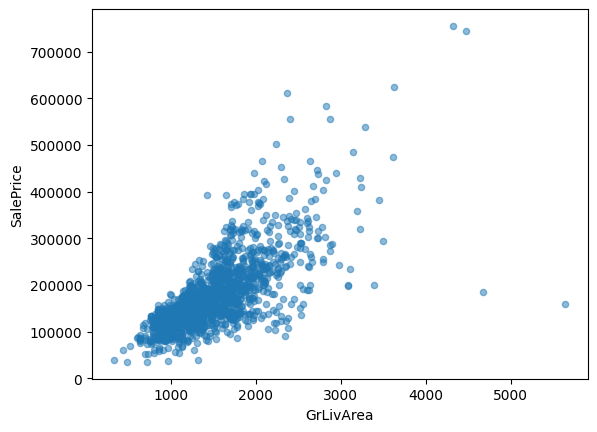

In [8]:
train_df.plot(kind="scatter", x="GrLivArea", y="SalePrice", alpha=0.5)

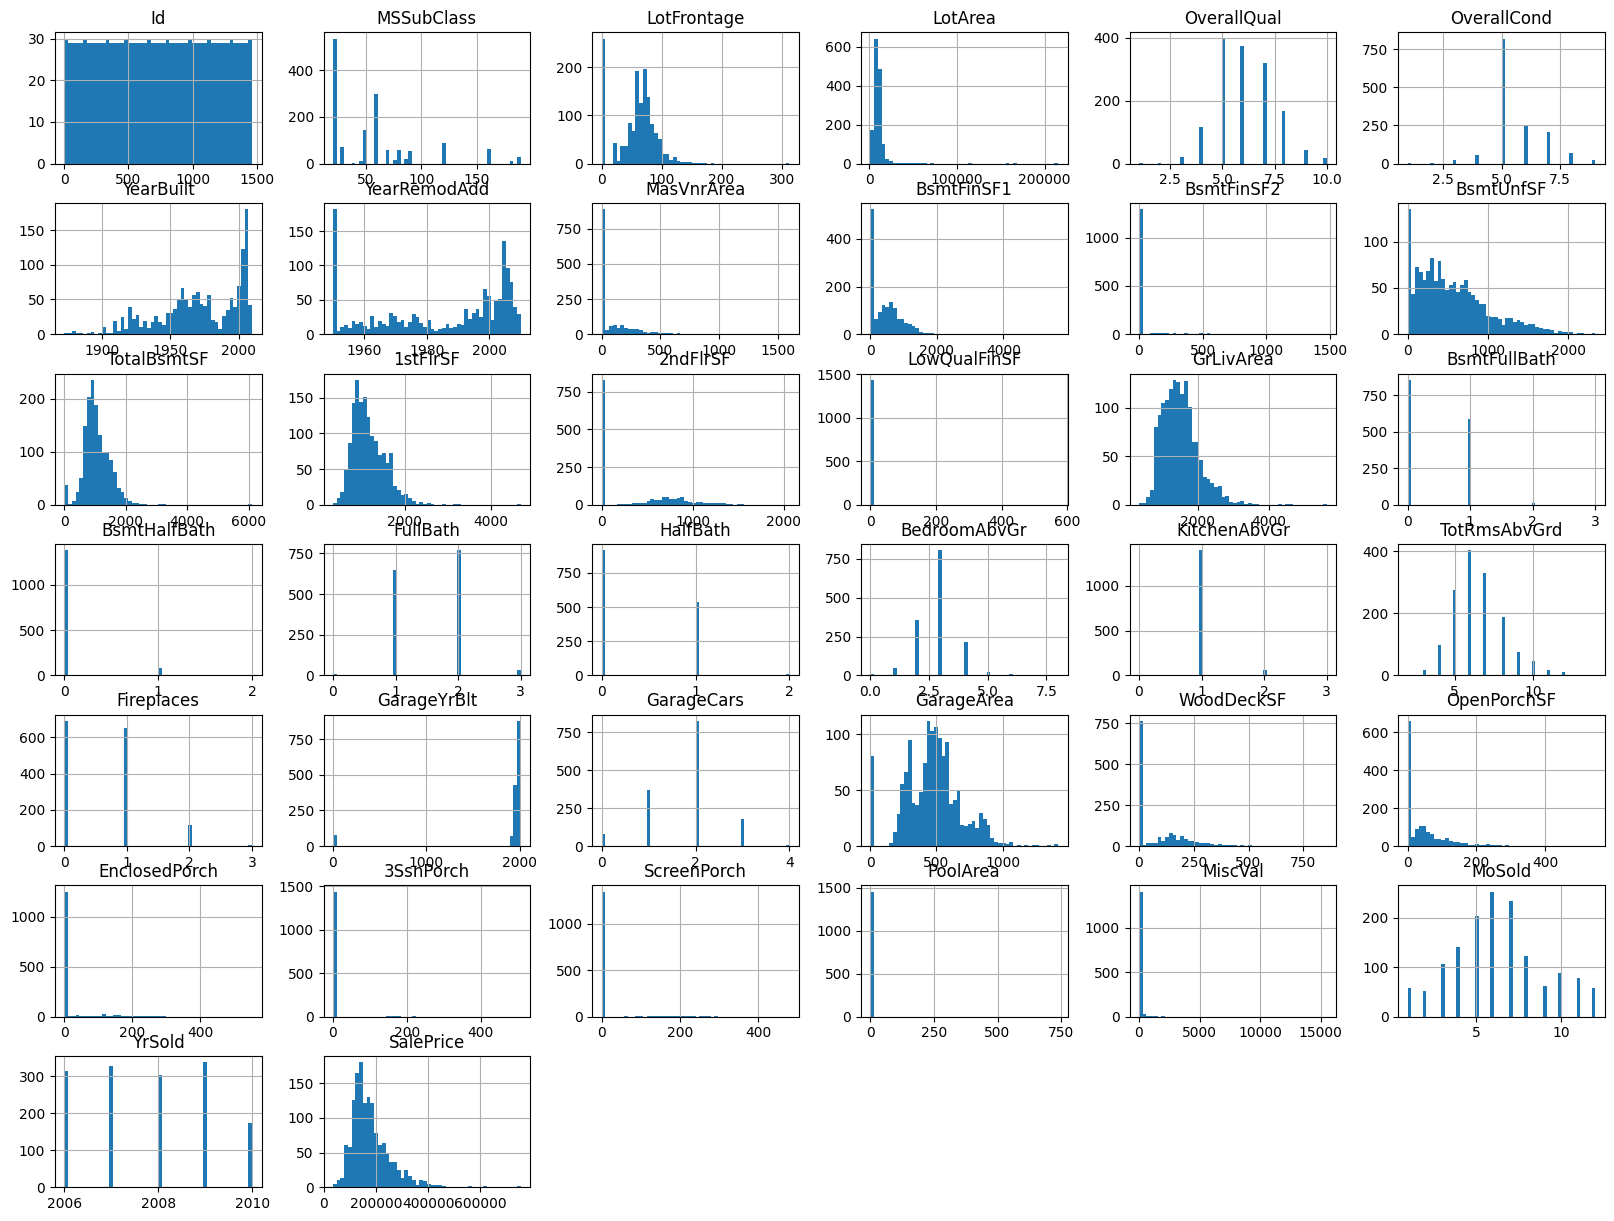

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
train_df.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:


#Extract the objective variable and characteristics.
x_data = train_df.drop('SalePrice', axis=1)
y_data = train_df['SalePrice']

#creatinf all the numeric featuers
num_feats = x_data.select_dtypes(include=[np.number])

# Split the data into training and validation sets
X_train, x_test, y_train, y_test = train_test_split(num_feats, y_data, test_size=0.2, random_state=42)

# Standardize the training and testing data
data_scaler = StandardScaler()
X_train_scaled = data_scaler.fit_transform(X_train)
x_test_scaled = data_scaler.transform(x_test)

# Train a linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions on the validation set
modl_pred = lr_model.predict(x_test_scaled)

# Evaluate the model
mse_lr = mean_squared_error(y_test, modl_pred)
print(f'mean sqaure error on the  testing data: {mse_lr}')


mean sqaure error on the  testing data: 1303003398.9647167


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [12]:
# Write your code here

rev_df = pd.read_csv('/content/annotated_reviews_new.csv')
rev_df['word_count'] = rev_df['cleaned_review'].apply(lambda x: len(str(x).split(" ")))
print(rev_df['word_count'].head())



#1.remove noise and number and punctuations
import re
rev_df['remove noise'] = rev_df['cleaned_review'].apply(lambda x: re.sub('[^A-Za-z0-9\s]+', '', x))
print(rev_df['remove noise'].head())


rev_df['punctuation'] = rev_df['cleaned_review'].str.replace('[^\w\s]','')
print(rev_df['punctuation'].head())


rev_df['Remove numbers'] = rev_df['cleaned_review'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]))
print(rev_df['Remove numbers'].head())

#(3)remove the stop words
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
wd_stop = stopwords.words('english')
rev_df[' Remove stopwords'] = rev_df['cleaned_review'].apply(lambda x: len([x for x in x.split() if x in wd_stop]))
wd_stop = stopwords.words('english')
rev_df[' Remove stopwords'] = rev_df['cleaned_review'].apply(lambda x: " ".join(x for x in x.split() if x not in wd_stop))
print(rev_df[' Remove stopwords'].head())

# converting all words into lowercase
rev_df[' Lowercase all texts'] = rev_df['cleaned_review'].apply(lambda x: " ".join(word.lower() for word in x.split()))
print(rev_df[' Lowercase all texts'].head())

#(5) stemming for all words and sentences
from nltk.stem import PorterStemmer
stemeng = PorterStemmer()
rev_df['cleaned_review'][:5].apply(lambda x: " ".join([stemeng.stem(wd) for wd in x.split()]))
print(rev_df['cleaned_review'].head())

0    224
1     69
2    127
3     68
4    218
Name: word_count, dtype: int64
0    weve banger movi kollywood might tamil movi ye...
1    power heartfelt movi karthik subbaraj true lov...
2    year sinc jigarthanda first releas peopl still...
3    karthik subbaraj film maker back come back kar...
4    jdx clearli karthik subbaraj best work sinc ji...
Name: remove noise, dtype: object
0    weve banger movi kollywood might tamil movi ye...
1    power heartfelt movi karthik subbaraj true lov...
2    year sinc jigarthanda first releas peopl still...
3    karthik subbaraj film maker back come back kar...
4    jdx clearli karthik subbaraj best work sinc ji...
Name: punctuation, dtype: object
0    weve banger movi kollywood might tamil movi ye...
1    power heartfelt movi karthik subbaraj true lov...
2    year sinc jigarthanda first releas peopl still...
3    karthik subbaraj film maker back come back kar...
4    jdx clearli karthik subbaraj best work sinc ji...
Name: Remove numbers, dtype: obj

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    weve banger movi kollywood might tamil movi ye...
1    power heartfelt movi karthik subbaraj true lov...
2    year sinc jigarthanda first releas peopl still...
3    karthik subbaraj film maker back come back kar...
4    jdx clearli karthik subbaraj best work sinc ji...
Name:  Remove stopwords, dtype: object
0    weve banger movi kollywood might tamil movi ye...
1    power heartfelt movi karthik subbaraj true lov...
2    year sinc jigarthanda first releas peopl still...
3    karthik subbaraj film maker back come back kar...
4    jdx clearli karthik subbaraj best work sinc ji...
Name:  Lowercase all texts, dtype: object
0    weve banger movi kollywood might tamil movi ye...
1    power heartfelt movi karthik subbaraj true lov...
2    year sinc jigarthanda first releas peopl still...
3    karthik subbaraj film maker back come back kar...
4    jdx clearli karthik subbaraj best work sinc ji...
Name: cleaned_review, dtype: object


In [14]:
from textblob import Word
import nltk
nltk.download('wordnet')
nltk.download("omw-1.4")

rev_df['Lemmatization '] = rev_df['cleaned_review'].apply(lambda x: " ".join([Word(a).lemmatize() for a in x.split()]))
rev_df['Lemmatization '].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0    weve banger movi kollywood might tamil movi ye...
1    power heartfelt movi karthik subbaraj true lov...
2    year sinc jigarthanda first releas peopl still...
3    karthik subbaraj film maker back come back kar...
4    jdx clearli karthik subbaraj best work sinc ji...
Name: Lemmatization , dtype: object

In [16]:
import pandas as pd
from nltk import ngrams
from collections import Counter

# n grams
wd_tokens = df_jigar['cleaned_review'].apply(lambda x: x.lower().split())
wd_trigrams = wd_tokens.apply(lambda x: list(ngrams(x, 3)))

# frequency of eachtrigram
wd_trigram_counts = Counter([item for sublist in wd_trigrams for item in sublist])

# trigrams
print(wd_trigram_counts.most_common(10))

[(('jigarthanda', 'doubl', 'x'), 280), (('karthik', 'subbaraj', 'film'), 120), (('cinema', 'jigarthanda', 'doubl'), 120), (('show', 'sj', 'surya'), 80), (('indian', 'movi', 'year'), 80), (('director', 'karthik', 'subbaraj'), 80), (('raghava', 'lawrenc', 'perform'), 80), (('subbaraj', 'best', 'work'), 80), (('sj', 'suryah', 'perform'), 80), (('movi', 'top', 'notch'), 80)]


In [17]:
import pandas as pd
import nltk
from nltk.util import ngrams
import nltk
nltk.download('punkt')

# tokenizing all sentences into words
df_jigar['tokens'] = df_jigar['cleaned_review'].apply(nltk.word_tokenize)

# creating all bigrams
df_jigar['bigrams'] = df_jigar['tokens'].apply(lambda x: list(ngrams(x, 2)))

# freq of each word
wd_frequency = {}
for a in df_jigar['tokens']:
    for d in a:
        if d in wd_frequency:
            wd_frequency[d] += 1
        else:
            wd_frequency[d] = 1

# probability of each one bigram
prob_bigram = {}
for g in df_jigar['bigrams']:
    for r in g:
        w2, w1 = r
        count_w2_w1 = g.count(r)
        count_w2 = wd_frequency[w2]
        prob_bigram[r] = count_w2_w1 / count_w2

# prob of bigrams
for r, h in prob_bigram.items():
    print(f'{r}: {h}')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


('weve', 'banger'): 0.025
('banger', 'movi'): 0.025
('movi', 'kollywood'): 0.00036231884057971015
('kollywood', 'might'): 0.025
('might', 'tamil'): 0.005
('tamil', 'movi'): 0.0035714285714285713
('movi', 'year'): 0.00036231884057971015
('year', 'skeptic'): 0.002777777777777778
('skeptic', 'jigarthanda'): 0.025
('jigarthanda', 'sequel'): 0.0010416666666666667
('sequel', 'announc'): 0.00625
('announc', 'wasnt'): 0.0125
('wasnt', 'sure'): 0.0125
('sure', 'make'): 0.004166666666666667
('make', 'cast'): 0.0013157894736842105
('cast', 'blown'): 0.00625
('blown', 'away'): 0.0125
('away', 'watchedy'): 0.0125
('watchedy', 'write'): 0.025
('write', 'stori'): 0.0035714285714285713
('stori', 'given'): 0.0014705882352941176
('given', 'topicaround'): 0.025
('topicaround', 'messag'): 0.025
('messag', 'good'): 0.0022727272727272726
('good', 'stori'): 0.001388888888888889
('stori', 'enough'): 0.0014705882352941176
('enough', 'film'): 0.00625
('film', 'make'): 0.0005952380952380953
('make', 'movi'): 0.0

In [18]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import defaultdict
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [20]:

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# for extractinh noun phrases
def count_nouns(text):
    stp_wds = set(stopwords.words('english'))
    wd_lemmatizer = WordNetLemmatizer()
    wd_tag_tokns = nltk.pos_tag(word_tokenize(text))
    nun_phar = []
    for i in range(len(wd_tag_tokns)):
        if wd_tag_tokns[i][1].startswith('NN'):
            np = wd_tag_tokns[i][0]
            j = i + 1
            while j < len(wd_tag_tokns) and wd_tag_tokns[j][1].startswith('NN'):
                np += ' ' + wd_tag_tokns[j][0]
                j += 1
            np = wd_lemmatizer.lemmatize(np.lower())
            if np not in stp_wds:
                nun_phar.append(np)
    return nun_phar

# file reading
with open('annotated_reviews_new.csv') as f:
    data_reviews = f.read().splitlines()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [22]:
# extracting the noun pjares
total_nun_phars = defaultdict(int)
review_noun_phrases = []
for a in data_reviews:
    noun_phrases = count_nouns(a)
    review_noun_phrases.append(noun_phrases)
    for n_phs in noun_phrases:
        total_nun_phars[n_phs] += 1

#for max frequen y
max_wd_freq = {}
for n_phs in total_nun_phars:
    max_wd_freq[n_phs] = max([total_nun_phars[n_phs] for n_phs_list in review_noun_phrases])

# relative prob
rw_prob = []
for i in range(len(data_reviews)):
    probs = {}
    for n_phs in review_noun_phrases[i]:
        probs[n_phs] = total_nun_phars[n_phs] / max_wd_freq[n_phs]
    rw_prob.append(probs)
# below we are having model results

print('\t' + '\t'.join(total_nun_phars.keys()))
for i in range(len(data_reviews)):
    row = [str(i+1)]
    for n_phs in total_nun_phars:
        if n_phs in rw_prob[i]:
            row.append(str(rw_prob[i][n_phs]))
        else:
            row.append('0')
    print('\t'.join(row))

	﻿id	cleaned_review	sentiment	banger movi kollywood	movi kollywood	kollywood	year	jigarthanda sequel announc	sequel announc	announc	stori	film	movi	simpl complic plot	complic plot	plot	messag jdx disagre	jdx disagre	disagre	easili	work ive	ive	time movi	layer	enjoy	didnt	transit tonegenr	tonegenr	jdx	use cinema	cinema	forth	way	shoot mean	mean	peopl film didnt	film didnt	messag hardhit	hardhit	didnt think	think	role lifetim	lifetim	show sj surya	sj surya	surya	guy manag youv	manag youv	youv	believ support	support	goodmus santhosh	santhosh	work	scene film	suppos	refresh	music continu bombard anirudh song sung mostli heroworshipingcinematographi	continu bombard anirudh song sung mostli heroworshipingcinematographi	bombard anirudh song sung mostli heroworshipingcinematographi	anirudh song sung mostli heroworshipingcinematographi	song sung mostli heroworshipingcinematographi	sung mostli heroworshipingcinematographi	mostli heroworshipingcinematographi	heroworshipingcinematographi	half	notch

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

